In [ ]:
import cv2
import tensorflow as tf
from keras.models import load_model

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/our_Kaggle'

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/our_kaggle/our_model.h5')

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

from IPython.display import FileLink,display, Image
from PIL import Image as I

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files     
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

from random import sample
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import numpy as np
import pandas as pd

from tqdm import tqdm
from glob import glob
import pickle
import zipfile
import os
import cv2
import timeit
import time
import h5py

In [ ]:
def get_cv2_image(path, img_size, color_type):
    # Loading as Grayscale image
    if color_type == 1:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Loading as color image
    elif color_type == 3:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
    # Reduce size
    img = cv2.resize(img[:500], (img_size, img_size)) 
    return img

In [ ]:
def load_testing_data(test_size,img_size, color_type):

    files = sorted(glob(os.path.join('/content/drive/MyDrive/our_kaggle/imgs/test', '*.jpg')))
    testing_image = []
    testing_image_id = []
    
    total = 0
    files_size = len(files)
    
    for file in tqdm(files):
        
        if total == test_size:
            break
            
        file_base = os.path.basename(file)
        img = get_cv2_image(file, img_size, color_type)
        testing_image.append(img)
        testing_image_id.append(file_base)
        
        total += 1
    return testing_image, testing_image_id

In [ ]:

IMG_SIZE   = 128 #if  tf.test.is_gpu_available(cuda_only=True) else 160
COLOR_TYPE = 3
CLASSES    = 10
EPOCHS     = 30
BATCHES    = 50
IMG_SIZE   = 128
TEST_SIZE  = 10

test_data, test_ids = load_testing_data(TEST_SIZE, IMG_SIZE, COLOR_TYPE)
test_data = np.array(test_data, dtype=np.uint8)
test_data = test_data.reshape(-1,IMG_SIZE,IMG_SIZE,COLOR_TYPE)

  0%|          | 3/79726 [00:00<1:15:44, 17.54it/s]


In [ ]:
print('Test shape:', test_data.shape)
print(test_data.shape[0], 'Test samples')

Test shape: (10, 128, 128, 3)
10 Test samples


In [ ]:
# mapping categotical
CAT_MAP = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

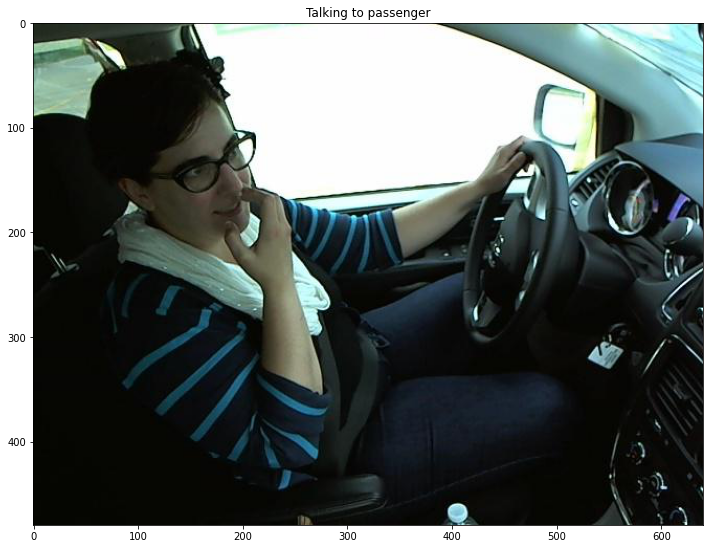

In [ ]:
plt.figure(figsize = (12, 20))
#image_count = 1
DIR = '/content/drive/MyDrive/our_kaggle/imgs/train/'

for directory in os.listdir(DIR):
    
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(DIR + directory)):
            if i == 2:
                break
            else:
                #fig = plt.subplot(2, 2, image_count)
                #image_count += 1
                image = mpimg.imread(DIR + directory + '/' + file)
                plt.imshow(image)
                plt.title(CAT_MAP[directory])

In [ ]:
def prediction():
    for i in np.arange(10):
        img_brute = test_data[i]

        im = cv2.resize(cv2.cvtColor(img_brute, cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE)).astype(np.float32) / 255.0
        im = np.expand_dims(im, axis =0)

        img_display = cv2.resize(img_brute,(IMG_SIZE,IMG_SIZE))
        plt.imshow(img_display, cmap='gray')

        y_preds = model.predict(im, batch_size=BATCHES, verbose=1)
        print(y_preds)
        y_prediction = np.argmax(y_preds)
        print('Y Prediction: {}'.format(y_prediction))
        print('Predicted as: {}'.format(CAT_MAP.get('c{}'.format(y_prediction))))

        plt.show()

1/1 [==============================] - 0s 81ms/step
[[0.09850807 0.09727096 0.09769373 0.10057916 0.1022522  0.10527377
  0.10019332 0.09814814 0.09963589 0.10044476]]
Y Prediction: 5
Predicted as: Operating the radio


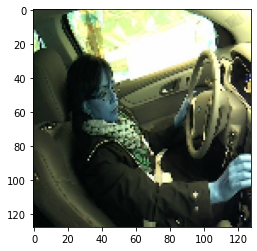

1/1 [==============================] - 0s 47ms/step
[[0.0997184  0.09889818 0.09856969 0.10191677 0.10287531 0.10139126
  0.09893074 0.09784298 0.10046341 0.09939326]]
Y Prediction: 4
Predicted as: Talking on the phone - left


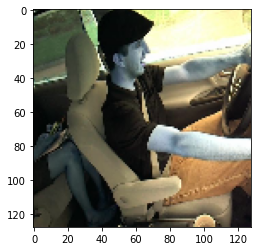

1/1 [==============================] - 0s 47ms/step
[[0.10096739 0.1012123  0.09727193 0.10093083 0.10139472 0.09827077
  0.09885728 0.09755702 0.10161033 0.10192737]]
Y Prediction: 9
Predicted as: Talking to passenger


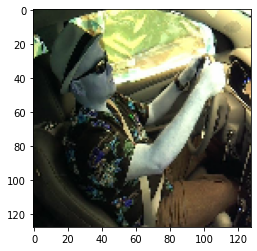

1/1 [==============================] - 0s 46ms/step
[[0.09680723 0.09737153 0.10184412 0.09762561 0.10480336 0.10089145
  0.10026035 0.1013297  0.1017786  0.09728805]]
Y Prediction: 4
Predicted as: Talking on the phone - left


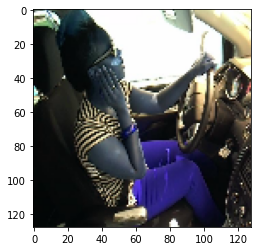

1/1 [==============================] - 0s 48ms/step
[[0.10046697 0.1007524  0.09861401 0.10351782 0.10101343 0.09939233
  0.09705729 0.09653714 0.09945948 0.10318912]]
Y Prediction: 3
Predicted as: Texting - left


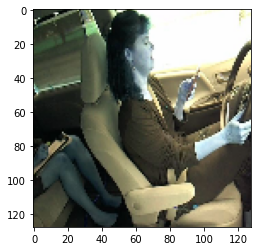

1/1 [==============================] - 0s 63ms/step
[[0.09917202 0.10048597 0.09708725 0.10342914 0.10194103 0.09951629
  0.09648788 0.09818392 0.10287929 0.10081713]]
Y Prediction: 3
Predicted as: Texting - left


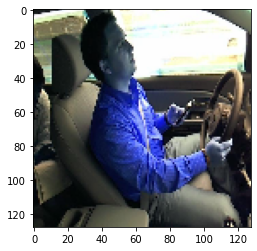

1/1 [==============================] - 0s 48ms/step
[[0.09993874 0.09726051 0.09792125 0.09822467 0.10273396 0.10330237
  0.10011777 0.09879471 0.10190794 0.09979814]]
Y Prediction: 5
Predicted as: Operating the radio


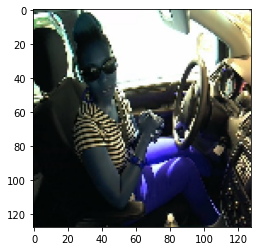

1/1 [==============================] - 0s 49ms/step
[[0.09569567 0.10060251 0.09915342 0.095943   0.10109796 0.0962593
  0.10402649 0.10121318 0.10574226 0.1002662 ]]
Y Prediction: 8
Predicted as: Hair and makeup


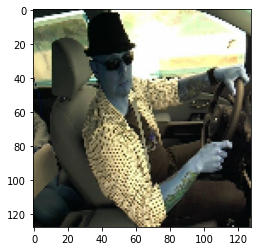

1/1 [==============================] - 0s 52ms/step
[[0.10118151 0.09876902 0.09896497 0.1024678  0.10017838 0.10142286
  0.09675758 0.09660793 0.1028257  0.10082423]]
Y Prediction: 8
Predicted as: Hair and makeup


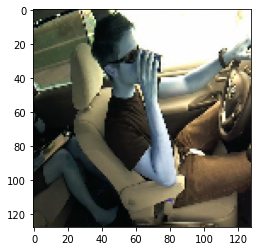

1/1 [==============================] - 0s 48ms/step
[[0.09799396 0.10498384 0.0976565  0.09771966 0.09970807 0.09577785
  0.10106897 0.10505746 0.10064147 0.09939223]]
Y Prediction: 7
Predicted as: Reaching behind


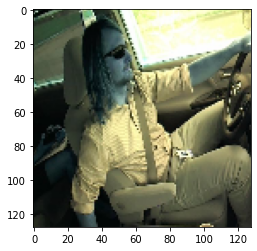

In [ ]:
prediction()